In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


Customer Analytics & A/B Testing in Python
- https://campus.datacamp.com/courses/customer-analytics-ab-testing-in-python/key-performance-indicators-measuring-business-success?ex=10

#### 1. groupby method

- data.groupby(by = ['id','device'], as_index = False, axis = 0 )['price'].mean()
- more flexible method using agg
   - data.groupby(by = ['id','device'], as_index = False, axis = 0 ).price.agg(['mean','median'])
   - ab_test_results.groupby('group').agg({'uid':pd.Series.nunique}) 
   - full aggregation
       - data.groupby(by = ['id','device'], as_index = False, axis = 0 ).agg(
       {'price':['mean','min'],
       'age':['median','max']}
       )

> custom aggregation

In [16]:
# example truncating mean
def truncate_mean(data):
    top_val = data.quantile(0.9)
    bottom_val = data.quantile(0.1)
    trun_data = data[(data <= top_val)&(data >= bottom_val)]
    return trun_data.mean()

data = tips
data_grp = data.groupby(by = ['sex','day'],  as_index = False,axis = 0 )
## important ##
final = data_grp.agg({'tip': [truncate_mean]})
final

,sex,day,tip
,,,truncate_mean
0,Male,Thur,2.897600
1,Male,Fri,2.466667
2,Male,Sat,2.765957
3,Male,Sun,3.119348
4,Female,Thur,2.324615
5,Female,Fri,2.818571
6,Female,Sat,2.690000
7,Female,Sun,3.399286


the df.rename() function and refer the columns to be renamed. Not all the columns have to be renamed:

df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
- Or rename the existing DataFrame (rather than creating a copy) 
df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)


In [17]:
final.columns = final.columns.droplevel(level = 1) # remove truncate_mean name and only use tip
final.rename(columns = {'tip':'truncate_mean_tip'}, inplace = True)
final

,sex,day,truncate_mean_tip
0,Male,Thur,2.897600
1,Male,Fri,2.466667
2,Male,Sat,2.765957
3,Male,Sun,3.119348
4,Female,Thur,2.324615
5,Female,Fri,2.818571
6,Female,Sat,2.690000
7,Female,Sun,3.399286


In [11]:
data.agg({'tip':['mean','median'],'total_bill':['mean','median','max']})

,total_bill,tip
max,50.810000,NaN
mean,19.785943,2.998279
median,17.795000,2.900000


### coversion rate
![title](conversion.png)

In [ ]:
### 2. example of conversion rate: after trial end date within a selected window, to see how many people converted to a paid user

##step1: filter data to remove immature data
current_date = pd.to_datetime('2018-03-17')
max_lapse_date = current_date - timedelta(days=7)
conv_sub_data = sub_data_demo[(sub_data_demo.lapse_date < max_lapse_date)]

#step2. get a new column to calcuate time interval between subscription and trial end date
sub_time = np.where(conv_sub_data.subscription_date.notnull(),(conv_sub_data.subscription_date -conv_sub_data.lapse_date).dt.days,
pd.NaT)
conv_sub_data['sub_time'] = sub_time

# get within 7 day converation rate
def gcr7(data):
    selected_data = data[data<= 7]
    return 1.00* selected_data.count()/data.count()

def gcr14(data):
    selected_data = data[data<= 14]
    return 1.00* selected_data.count()/data.count()

conv_sub_data.groupby('sex').agg({'sub_time':[gcr7, gcr14]})
conv_sub_data.columns = conv_sub_data.columns.droplevel(level=1)

In [ ]:
#another example: Find the month 1 values 
month1 = np.where((purchase_data.reg_date < max_reg_date) &
                 (purchase_data.date <= purchase_data.reg_date + timedelta(days=28)),
                 purchase_data.price, np.NaN)

# Update the value in the DataFrame 
purchase_data['month1'] = month1
# Group the data by gender and device 
purchase_data_upd = purchase_data.groupby(by=['gender', 'device'], as_index=False) 

# Aggregate the month1 and price data 
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

#### 2. Working with time series data in pandas
   - some useful way to get date format when upload csv
      - pd.read_csv(...
                , parse_dates = False
                , infer_datetime_format = False
                , keep_date_col = False
                , date_parser = None
                , dayfirst = False
                , ...)
   - parse date manually
       - date_data_one = pd.to_datetime(date_data_one, format=____)
           - for example Saturday January 27, 2017
           - date_data_one = pd.to_datetime(date_data_one, format="%A %B %d, %Y")
           - "%Y %B %d %H:%M"

In [ ]:
# Find the average amount purchased per user per day
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

> remove seasonality: 
   - trailing average(rolling = 7)
      - df.column.rolling(window = 7, center)
   - exponential moving average
      - df.column.ewm(span = 7)

In [ ]:
# below are examples to get 
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.show()

In [ ]:
Another example: plot

In [47]:
release = pd.read_csv('release.csv', delimiter= '\t', parse_dates= True, infer_datetime_format = True)
release.release_date = pd.to_datetime(release.release_date)
release

,release_date,event
0,2018-03-15,iOS
1,2018-03-17,android
2,2018-03-18,web
3,2018-03-25,android


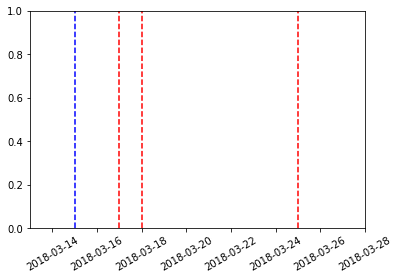

In [60]:
import datetime

for (indx, val) in zip(release.index,release['event']):
    if val == 'iOS':
        plt.axvline(x=release.loc[indx].release_date, color='b', linestyle='--')
    else:
        plt.axvline(x=release.loc[indx].release_date, color='r', linestyle='--')

datemin = release.release_date.min() - datetime.timedelta(days=2)
datemax = release.release_date.max() + datetime.timedelta(days=3)
plt.xlim(datemin,datemax )
plt.xticks(rotation = 30)
# plt.xticks(np.arange(min(x), max(x)+1, 3))
plt.show()

#### 3. ab testing

In [ ]:
> below is a code to get p-value for a proportion ab test (use p_pool)

In [2]:
def get_pvalue(con_conv, test_conv,con_size, test_size):
    lift = - abs(test_conv - con_conv)
    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    ## get standard error below
    scale_val = (scale_one + scale_two)**0.5
    ## if it is two-side give 2*, if one-side, just stats.norm.cdf(lift, loc = 0, scale = scale_val )
    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )
    return p_value

In [ ]:
# use p_pool t test method
def get_pvalue(p1, p2 ,N1, N2):
    diff = p2 - p1
    p_pool = 1.00* (N1*p1 + N2*p2)/(N1+N2)
    print ('p2 and p1 are: %.4f and %.4f' %(p2, p1))
    ## get standard error below
    SE = np.sqrt(p_pool* (1-p_pool) * (1.00/N1 + 1.00/N2))
    
    ## if it is two-side give 2*, if one-side, just stats.norm.cdf(lift, loc = 0, scale = scale_val )
    Z_score = 1.00* diff/SE
    print ('Z score is: %.3f' %Z_score)
    p_value = 2* stats.norm.sf(abs(Z_score)) #one-sided by 2
#     p_value = 2 * stats.norm.cdf(diff, loc = 0, scale = SE )
    return p_value


print ('use p_pool method')
get_pvalue(p1,p2,N1,N2)

In [9]:
from scipy import stats

## use cdf to get z score
stats.norm.ppf(0.975) ##get 1.96

## use z score to get cdf
stats.norm.sf(abs(1.96)) ## get cdf, in one-tail: 2.5%

0.024997895148220435

> Plotting the distribution using ab test results to plot mean distribution of each variant (confidence interval calculation)

- 1. plot mean distributions of each variant (confidence interval)

In [ ]:
# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace( cont_conv - 3 * control_sd, cont_conv + 3 * control_sd , 100)
test_line = np.linspace( test_conv - 3 * test_sd,  test_conv + 3 * test_sd , 100)

# Plot the distribution 
plt.plot(control_line, mlab.normpdf(control_line, cont_conv, control_sd ))
plt.plot(test_line, mlab.normpdf(test_line,test_conv, test_sd))
plt.show()

- 2. plot difference: lets plot the difference distribution of our results that is, the distribution of our lift. (null hypothesis)

In [ ]:
import matplotlib.mlab as mlab
# Find the lift mean and standard deviation
lift_mean = test_conv - cont_conv
p_pool = 1.00* (N1*p1 + N2*p2)/(N1+N2)
SE = np.sqrt(p_pool* (1-p_pool) * (1.00/N1 + 1.00/N2))
# lift_sd = (test_var + cont_var) ** 0.5

# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * SE, lift_mean + 3 * SE, 100)

# Plot the lift distribution
plt.plot(lift_line, mlab.normpdf(lift_line, lift_mean, SE))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
# plt.axvline(x = lwr_ci, color = 'red')
# plt.axvline(x = upr_ci, color = 'red')
plt.show()

> plot normal distribution: Given a mean and a variance is there a simple pylab function call which will plot a normal distribution

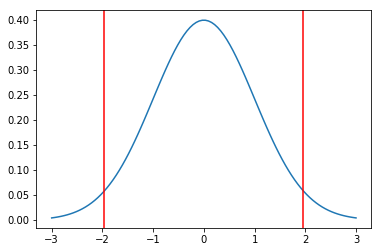

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

lwr_ci = mu - 1.96* sigma
upr_ci = mu + 1.96* sigma
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.axvline(x = lwr_ci, color = 'red')
plt.axvline(x = upr_ci, color = 'red')
plt.show()